## Equations for Phase Separation in Binary Mixtures

### Free Energy Density `f(φ)`
The free energy density as a function of the volume fraction `φ` is given by the Flory-Huggins expression:
$$
f(\phi) = \frac{k_B T}{\nu} \left( \phi \ln(\phi) + (1 - \phi) \ln(1 - \phi) \right) + \chi \phi (1 - \phi)
$$
where `k_B` is the Boltzmann constant, `T` is the temperature, `ν` is the molecular volume, and `χ` is the Flory-Huggins interaction parameter.

### Chemical Potential `μ(φ)`
The chemical potential as a function of `φ` can be found by taking the derivative of the free energy density with respect to `φ`:
$$
\mu(\phi) = \frac{\partial f(\phi)}{\partial \phi}
$$

For a system to exhibit phase separation, the interaction parameter `χ` should be greater than 2. This condition affects the free energy density curve, introducing two minima that suggest the tendency of the system to separate into two distinct phases.

The Python code uses these equations to plot the free energy density and chemical potential for a range of volume fractions `φ`, considering different normalized temperature `θ` values, where `θ` is defined as:
$$
\theta = \frac{k_B T}{\nu \chi}
$$
The interaction parameter `χ` influences the minima in the free energy density curve, which in turn affects the chemical potential and the system's phase separation behavior.


Given the interaction parameter χ is set to 2.5 and we have values for θ (theta), we can backtrack to find the \( \frac{k_B T}{\nu} \) values if we assume a specific value for χ. The relation between θ, χ, and \( \frac{k_B T}{\nu} \) is given by:

$$
\theta = \frac{k_B T}{\nu \chi}
$$

If we set χ to 2.5 and know the values of θ, we can rearrange the equation to solve for \( \frac{k_B T}{\nu} \):

$$
\frac{k_B T}{\nu} = \theta \cdot \chi
$$



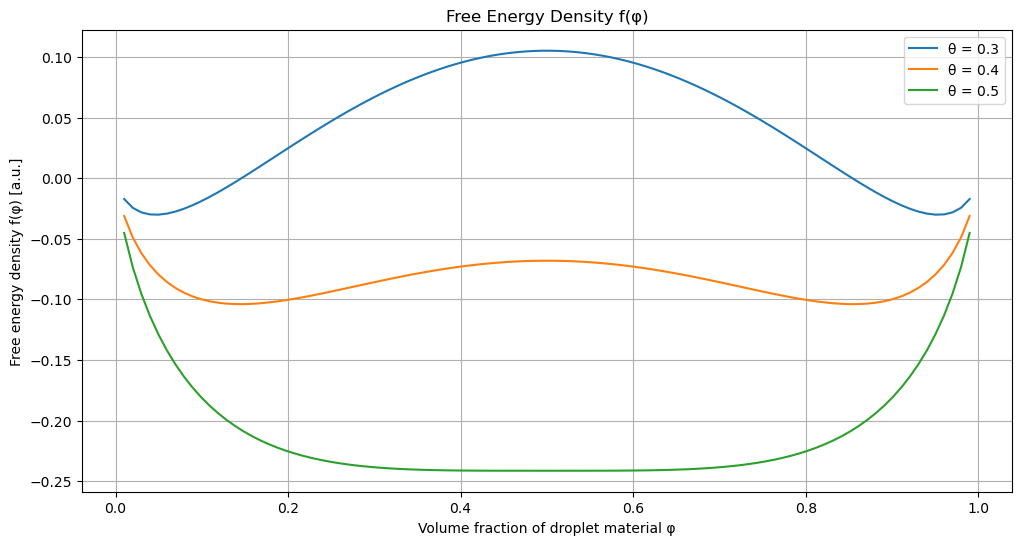

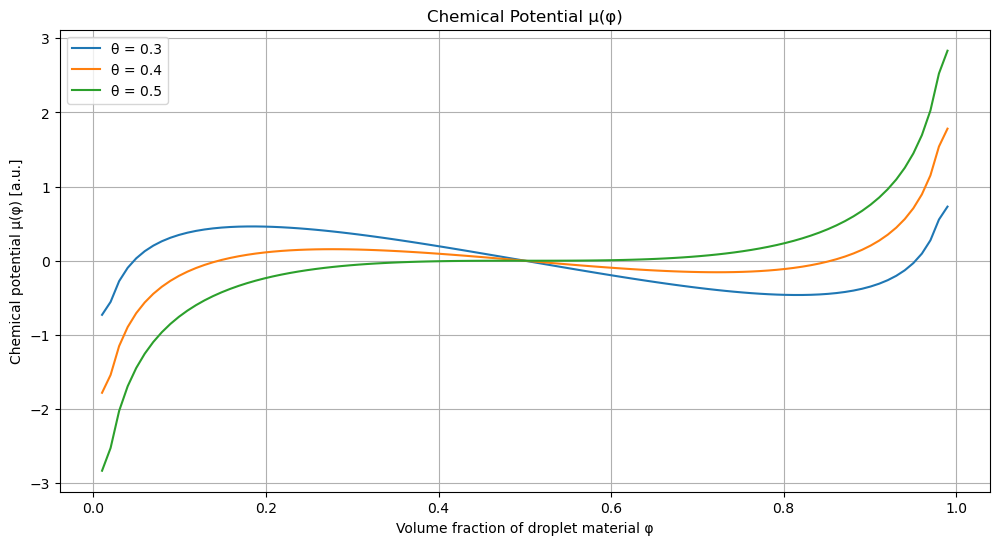

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the interaction parameter and normalized temperatures
interaction_parameter = 2.5
theta_values = [0.3, 0.4, 0.5]  # Given theta values from the figure

# Define the range for the volume fraction of droplet material
phi = np.linspace(0.01, 0.99, 100)  # Avoid division by zero

# Calculate free energy density f(φ) and chemical potential μ(φ) for different theta values
free_energy_densities = {}
chemical_potentials = {}

for theta in theta_values:
    # Calculate kBT/ν for the given theta and interaction parameter
    kBT_nu = theta * interaction_parameter
    
    # Free energy density calculation
    f_phi = kBT_nu * (phi * np.log(phi) + (1 - phi) * np.log(1 - phi)) + interaction_parameter * phi * (1 - phi)
    free_energy_densities[theta] = f_phi
    
    # Chemical potential calculation
    mu_phi = np.gradient(f_phi, phi)
    chemical_potentials[theta] = mu_phi

# Plot free energy density f(φ)
plt.figure(figsize=(12, 6))
for theta, f_phi in free_energy_densities.items():
    plt.plot(phi, f_phi, label=f'θ = {theta}')

plt.title('Free Energy Density f(φ)')
plt.xlabel('Volume fraction of droplet material φ')
plt.ylabel('Free energy density f(φ) [a.u.]')
plt.legend()
plt.grid(True)
plt.show()

# Plot chemical potential μ(φ)
plt.figure(figsize=(12, 6))
for theta, mu_phi in chemical_potentials.items():
    plt.plot(phi, mu_phi, label=f'θ = {theta}')

plt.title('Chemical Potential μ(φ)')
plt.xlabel('Volume fraction of droplet material φ')
plt.ylabel('Chemical potential μ(φ) [a.u.]')
plt.legend()
plt.grid(True)
fig_save_path = 'data/free_energy density with volumn fraction.png'

# Save the figure to the defined path
plt.savefig(fig_save_path)
plt.show()



The plot shows the free energy density `f(φ)` for a binary fluid system as a function of the volume fraction of droplet material `φ`, for different normalized temperature values `θ`. 

- The **blue dots** represent the minima of the free energy density curves, corresponding to the system's most stable states.
- The **orange hexagons** indicate the inflection points of the curves, marking the boundaries of the spinodal region where the system is unstable.


#### Phase Stability and Separation
The minima in the free energy density indicate where the mixture is stable. The spinodal region is where the mixture is unstable and will spontaneously demix into phases corresponding to the minima of `f(φ)`. This demixing is known as spinodal decomposition.

Understanding these concepts is key in material science, biophysics, and nanotechnology for controlling phase behavior in designing materials and understanding biological processes.
To calculate the minima and inflection points of the free energy density function \( f(\phi) \), we use calculus. Specifically, we look at the first and second derivatives of the function with respect to the composition \( \phi \).

### Finding Minima:

Minima are points where the function has a local lowest value. To find these mathematically:

1. **Calculate the First Derivative (Chemical Potential)**:
   The first derivative of the free energy density with respect to \( \phi \) is the chemical potential \( \mu(\phi) \):
   $$ \mu(\phi) = \frac{\partial f(\phi)}{\partial \phi} $$

2. **Set the First Derivative to Zero**:
   Potential minima and maxima occur where this derivative is zero:
   $$ \frac{\partial f(\phi)}{\partial \phi} = 0 $$

3. **Check the Second Derivative**:
   Calculate the second derivative of \( f(\phi) \):
   $$ \frac{\partial^2 f(\phi)}{\partial \phi^2} $$
   If this is positive at points where the first derivative is zero, those points are minima.

### Finding Inflection Points:

Inflection points occur where the curvature of the function changes, indicated by a sign change in the second derivative.

1. **Calculate the Second Derivative**:
   The second derivative with respect to \( \phi \) is:
   $$ \frac{\partial^2 f(\phi)}{\partial \phi^2} $$

2. **Identify Sign Changes**:
   Inflection points are found where this derivative changes sign:
   $$ \frac{\partial^2 f(\phi)}{\partial \phi^2} = 0 $$
   A change in sign around this zero value indicates an inflection point.



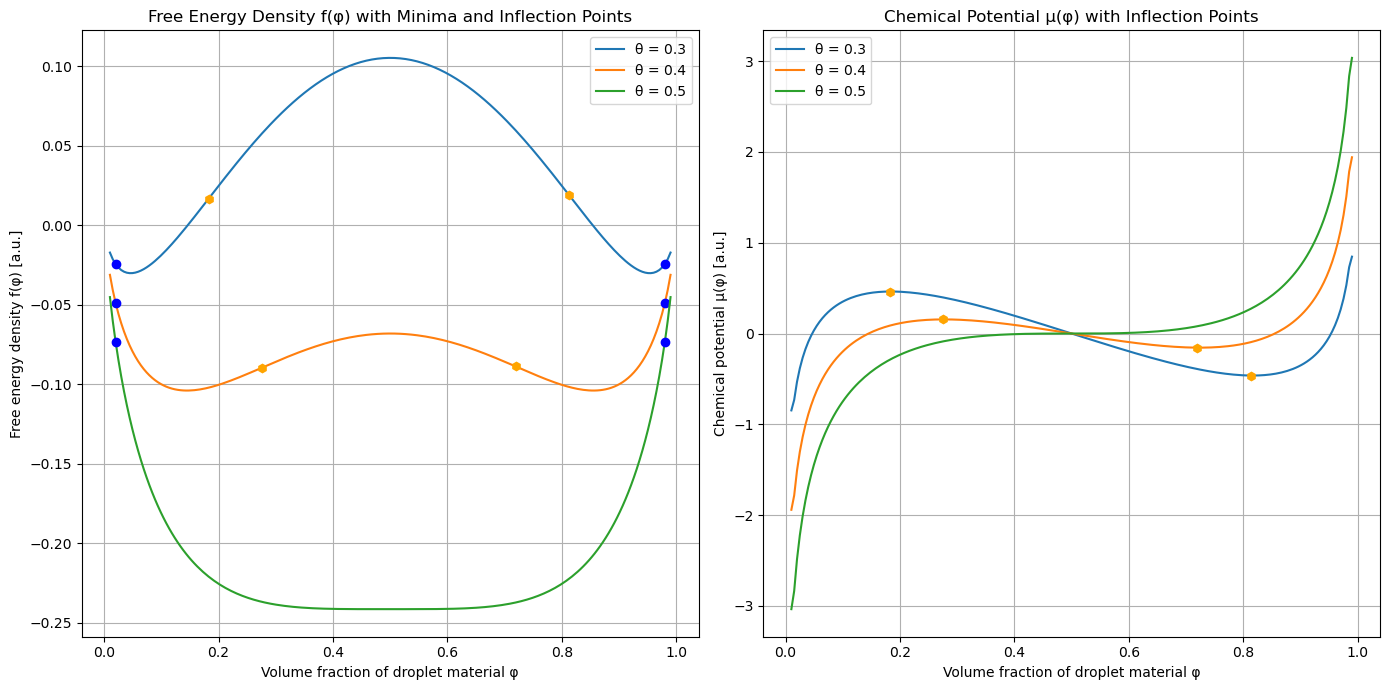

In [2]:
# Define the interaction parameter and normalized temperatures
interaction_parameter = 2.5
theta_values = [0.3, 0.4, 0.5]  # Given theta values from the figure

# Define the range for the volume fraction of droplet material
phi = np.linspace(0.01, 0.99, 200)  # Finer resolution for more accurate minima and inflection points

# Calculate free energy density f(φ) and chemical potential μ(φ) for different theta values
free_energy_densities = {}
chemical_potentials = {}
minima_points = {}
inflection_points = {}
chemical_inflection_points = {}

for theta in theta_values:
    # Calculate kBT/ν for the given theta and interaction parameter
    kBT_nu = theta * interaction_parameter
    
    # Free energy density calculation
    f_phi = kBT_nu * (phi * np.log(phi) + (1 - phi) * np.log(1 - phi)) + interaction_parameter * phi * (1 - phi)
    free_energy_densities[theta] = f_phi
    
    # Chemical potential calculation
    mu_phi = np.gradient(f_phi, phi)
    chemical_potentials[theta] = mu_phi
    
    # Find minima and inflection points by looking at the gradients
    d2f_dphi2 = np.gradient(mu_phi, phi)
    minima_indices = np.where(np.r_[True, d2f_dphi2[1:] > d2f_dphi2[:-1]] & np.r_[d2f_dphi2[:-1] > d2f_dphi2[1:], True])[0]
    inflection_indices = np.where(np.diff(np.sign(d2f_dphi2)))[0]
    
    # Store minima and inflection points for f(phi)
    minima_points[theta] = phi[minima_indices], f_phi[minima_indices]
    inflection_points[theta] = phi[inflection_indices], f_phi[inflection_indices]
    
    # Store inflection points for mu(phi)
    chemical_inflection_points[theta] = phi[inflection_indices], mu_phi[inflection_indices]

# Plotting the marked free energy density and chemical potential
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for free energy density
for theta in theta_values:
    axes[0].plot(phi, free_energy_densities[theta], label=f'θ = {theta}')
    # Mark the minima with blue dots
    axes[0].plot(*minima_points[theta], 'bo')
    # Mark the inflection points with orange hexagons
    axes[0].plot(*inflection_points[theta], 'h', color='orange')

axes[0].set_title('Free Energy Density f(φ) with Minima and Inflection Points')
axes[0].set_xlabel('Volume fraction of droplet material φ')
axes[0].set_ylabel('Free energy density f(φ) [a.u.]')
axes[0].legend()
axes[0].grid(True)

# Plot for chemical potential
for theta in theta_values:
    axes[1].plot(phi, chemical_potentials[theta], label=f'θ = {theta}')
    # Mark the inflection points with orange hexagons
    axes[1].plot(*chemical_inflection_points[theta], 'h', color='orange')

axes[1].set_title('Chemical Potential µ(φ) with Inflection Points')
axes[1].set_xlabel('Volume fraction of droplet material φ')
axes[1].set_ylabel('Chemical potential µ(φ) [a.u.]')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
fig_save_path = 'data/minima_inflection_point.png'

# Save the figure to the defined path
plt.savefig(fig_save_path)
plt.show()


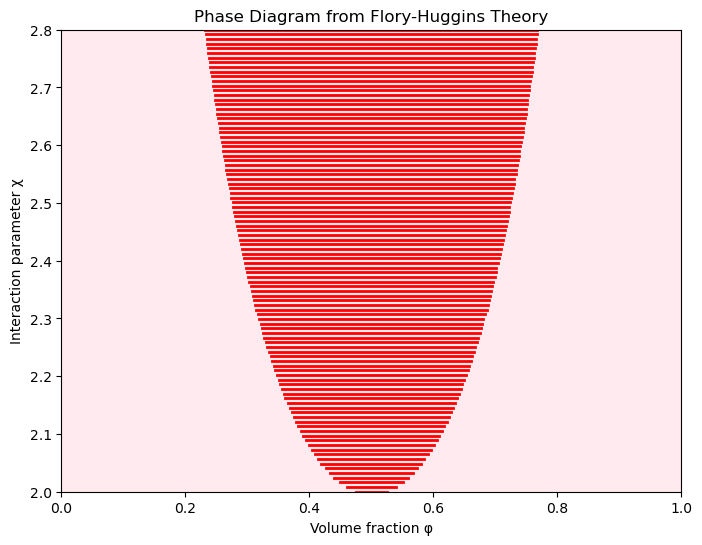

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants and interaction parameter range
chi_values = np.linspace(2.0, 2.8, 100)  # Interaction parameter range
phi = np.linspace(0, 1, 1000)  # Composition range from 0 to 1

# Flory-Huggins free energy density function
def flory_huggins(phi, chi):
    # Avoid division by zero
    phi = np.clip(phi, 1e-6, 1 - 1e-6)
    return phi * np.log(phi) + (1 - phi) * np.log(1 - phi) + chi * phi * (1 - phi)

# Function to find the common tangent (coexistence curve)
def common_tangent(phi, chi):
    f_phi = flory_huggins(phi, chi)
    mu = np.gradient(f_phi, phi)  # Chemical potential
    d2f_dphi2 = np.gradient(mu, phi)  # Second derivative (curvature)
    
    # Find the binodal points by looking for where the second derivative approaches zero
    binodal_indices = np.where(np.isclose(d2f_dphi2, 0, atol=1e-2))[0]
    
    # If there are multiple regions where the second derivative is zero, take the first and last points
    if len(binodal_indices) > 2: 
        binodal_indices = [binodal_indices[0], binodal_indices[-1]]
    
    # The binodal points correspond to the minima of the free energy curve
    phi_binodal = phi[binodal_indices]
    mu_binodal = mu[binodal_indices]
    
    return phi_binodal, mu_binodal

# Plot the phase diagram
plt.figure(figsize=(8, 6))

for chi in chi_values:
    phi_binodal, mu_binodal = common_tangent(phi, chi)
    if len(phi_binodal) == 2:  # Ensure we have two points for a common tangent
        plt.plot(phi_binodal, [chi, chi], 'r-', lw=2)  # Draw a horizontal tie line

# Label the axes
plt.xlabel('Volume fraction φ')
plt.ylabel('Interaction parameter χ')
plt.title('Phase Diagram from Flory-Huggins Theory')
plt.xlim(0, 1)
plt.ylim(chi_values[0], chi_values[-1])

# Highlight the two-phase region
plt.fill_betweenx(chi_values, 0, 1, where=(chi_values >= 2), color='pink', alpha=0.3)
fig_save_path = 'data/Phase Diagram from Flory-Huggins Theory.png'

# Save the figure to the defined path
plt.savefig(fig_save_path)
plt.show()


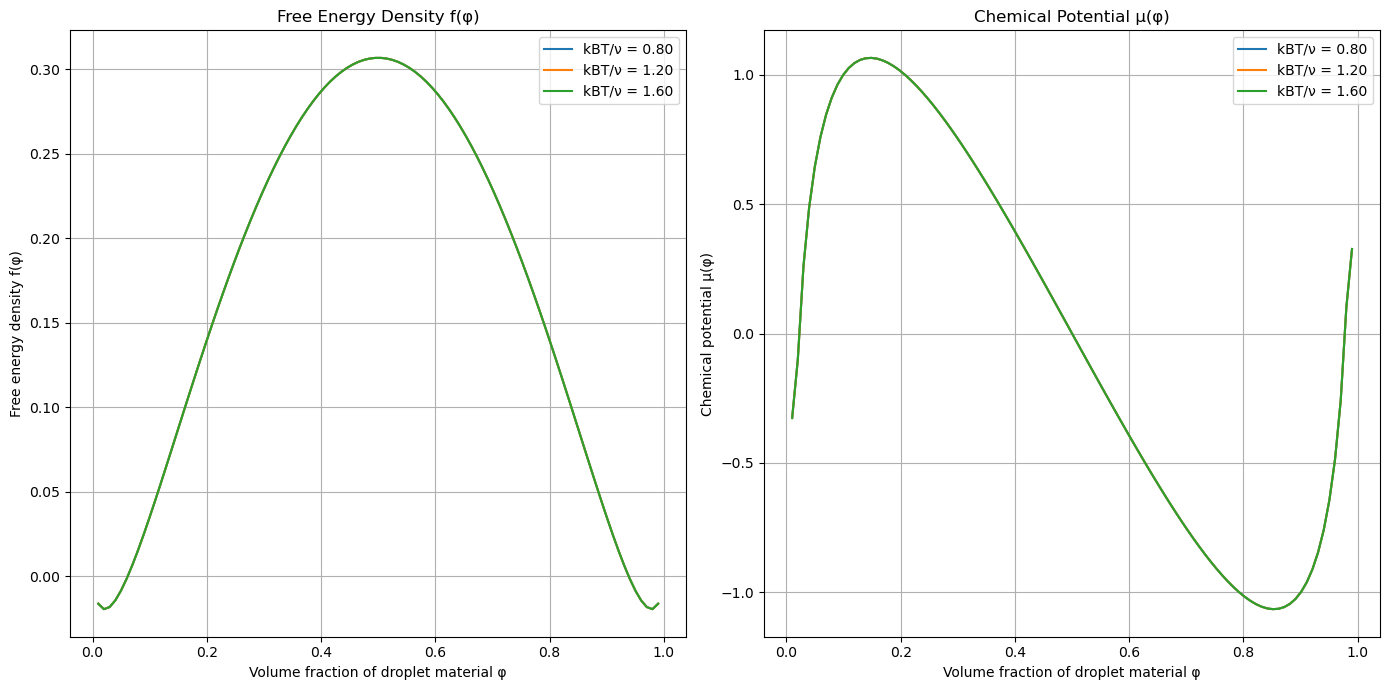

In [3]:
# Given interaction parameter
chi = 4  # Interaction parameter for phase separation

# Normalized temperature values for which the system exhibits two phases
theta_values = [0.2, 0.3, 0.4]

# Calculate kBT/ν for each theta value
kBT_nu_values = [theta * chi for theta in theta_values]

# Volume fraction range from 0 to 1
phi_values = np.linspace(0.01, 0.99, 100)  # Avoid division by zero in log

# Calculate free energy density for different kBT/ν values
f_phi_kBT_nu = {}
for kBT_nu in kBT_nu_values:
    f_phi_kBT_nu[kBT_nu] = (phi_values * np.log(phi_values) + (1 - phi_values) * np.log(1 - phi_values)) + chi * phi_values * (1 - phi_values)

# Calculate chemical potential for different kBT/ν values
mu_phi_kBT_nu = {}
for kBT_nu in kBT_nu_values:
    mu_phi_kBT_nu[kBT_nu] = np.gradient(f_phi_kBT_nu[kBT_nu], phi_values)

# Plotting the free energy density and chemical potential
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for free energy density
for kBT_nu in kBT_nu_values:
    axes[0].plot(phi_values, f_phi_kBT_nu[kBT_nu], label=f'kBT/ν = {kBT_nu:.2f}')

axes[0].set_title('Free Energy Density f(φ)')
axes[0].set_xlabel('Volume fraction of droplet material φ')
axes[0].set_ylabel('Free energy density f(φ)')
axes[0].legend()
axes[0].grid(True)

# Plot for chemical potential
for kBT_nu in kBT_nu_values:
    axes[1].plot(phi_values, mu_phi_kBT_nu[kBT_nu], label=f'kBT/ν = {kBT_nu:.2f}')

axes[1].set_title('Chemical Potential µ(φ)')
axes[1].set_xlabel('Volume fraction of droplet material φ')
axes[1].set_ylabel('Chemical potential µ(φ)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()



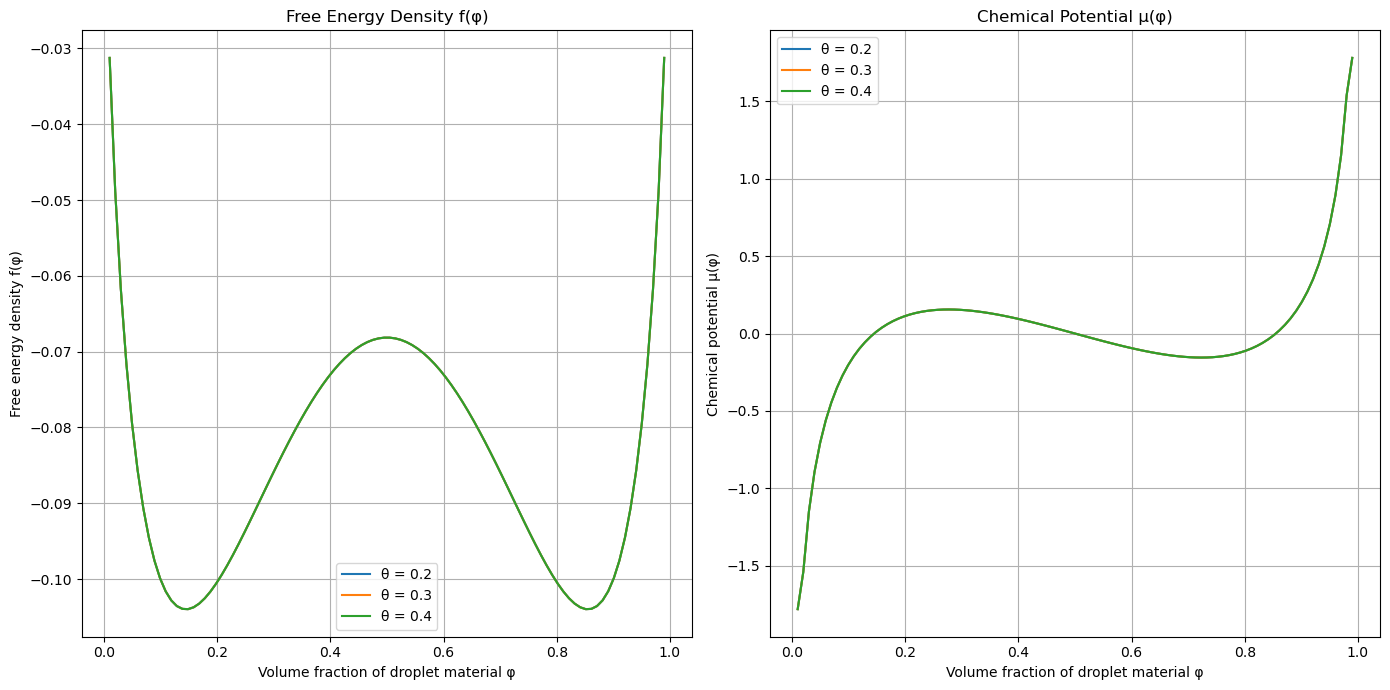

In [4]:
# Revised parameters for free energy calculation considering the interaction parameter
interaction_parameter = 2.5  # Assuming a value greater than 2 for phase separation

# Normalized temperature values for which the system exhibits two phases
theta_values = [0.2, 0.3, 0.4]  # Normalized temperatures theta = kBT/(νχ)

# Volume fraction range from 0 to 1
phi_values = np.linspace(0.01, 0.99, 100)  # Avoid division by zero in log

# Calculate free energy density for different theta values
f_phi = {}
for theta in theta_values:
    f_phi[theta] = (phi_values * np.log(phi_values) + (1 - phi_values) * np.log(1 - phi_values)) + interaction_parameter * phi_values * (1 - phi_values)

# Calculate chemical potential for different theta values
mu_phi = {}
for theta in theta_values:
    mu_phi[theta] = np.gradient(f_phi[theta], phi_values)

# Plotting the free energy density and chemical potential
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for free energy density
for theta in theta_values:
    axes[0].plot(phi_values, f_phi[theta], label=f'θ = {theta}')

axes[0].set_title('Free Energy Density f(φ)')
axes[0].set_xlabel('Volume fraction of droplet material φ')
axes[0].set_ylabel('Free energy density f(φ)')
axes[0].legend()
axes[0].grid(True)

# Plot for chemical potential
for theta in theta_values:
    axes[1].plot(phi_values, mu_phi[theta], label=f'θ = {theta}')

axes[1].set_title('Chemical Potential µ(φ)')
axes[1].set_xlabel('Volume fraction of droplet material φ')
axes[1].set_ylabel('Chemical potential µ(φ)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


## Free Energy of a Droplet

The free energy `F` of a system that includes a droplet can be described by three terms:

1. **Bulk Free Energy Inside the Droplet**:
   - Given by $V f(\phi_-)$, where $V$ is the volume of the droplet and $f(\phi_-)$ is the free energy density of the droplet material.

2. **Bulk Free Energy Outside the Droplet**:
   - Given by $(V_c - V) f(\phi_+)$, where $V_c$ is the total volume of the system and $f(\phi_+)$ is the free energy density of the surrounding material.

3. **Surface Free Energy**:
   - Given by $\gamma A$, where $A$ is the surface area of the droplet and $\gamma$ is the surface tension.

When we have a small droplet and the volume fraction outside the droplet $\phi_+$ doesn't deviate much from the average volume fraction $\bar{\phi}$ of the entire system, the free energy can be approximated by expanding $f(\phi_+)$ around $\bar{\phi}$:

$$
F \approx f(\bar{\phi})V_c - \Delta f \cdot V + \gamma A
$$

Where:
- $\Delta f = f(\bar{\phi}) - f(\phi_-) + \tilde{\mu}(\bar{\phi})(\phi_- - \bar{\phi})$
- $\tilde{\mu}(\phi)$ is the derivative of $f$ with respect to $\phi$, which is related to the chemical potential $\mu$ by $\mu = \nu \tilde{\mu}$, with $\nu$ being the molecular volume.

## Critical Droplet Size

This equation shows that the free energy of a droplet depends on its size due to the competing effects of the bulk term and the surface term:

- The bulk term $\Delta f \cdot V$ scales with the volume of the droplet, which is proportional to $R^3$ (since $V = \frac{4}{3}\pi R^3$).
- The surface term $\gamma A$ scales with the surface area of the droplet, which is proportional to $R^2$ (since $A = 4\pi R^2$).

For small droplets, the surface term, which is always positive due to the positive surface tension, dominates and leads to an increase in free energy with increasing droplet size. This means small droplets tend to dissolve to minimize the system's free energy.

For larger droplets, the bulk term can dominate if $\Delta f > 0$, meaning that the formation of the droplet reduces the free energy of the system. In such cases, once the droplet reaches a critical size where the reduction in bulk free energy outweighs the cost in surface free energy, the droplet becomes stable and can grow further.


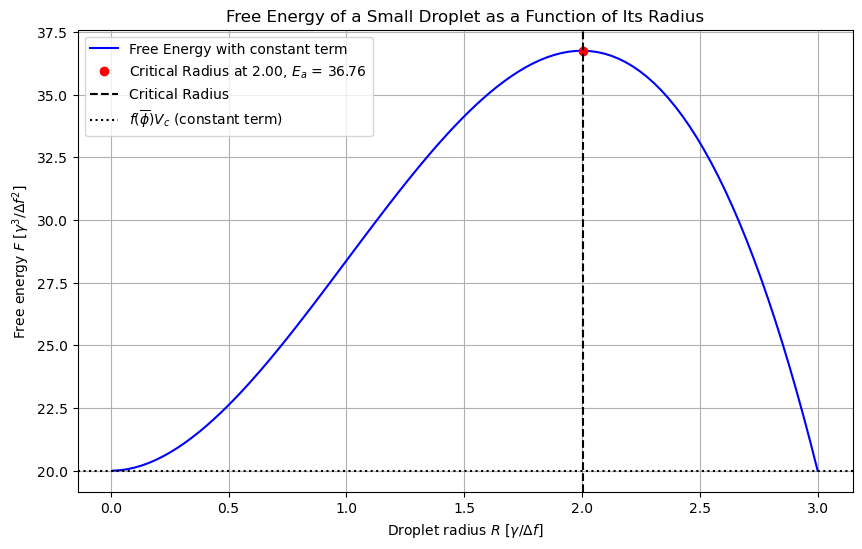

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the free energy equation
gamma = 1  # surface tension, arbitrary units
delta_f = 1  # free energy density difference, arbitrary units

# Define the radius range over which to calculate the free energy
R = np.linspace(0.01, 3, 100)  # Avoid division by zero at R=0

# Calculate the free energy as a function of the droplet radius without the constant term
#F = -delta_f * (4/3) * np.pi * R**3 + gamma * 4 * np.pi * R**2

# Find the index of the radius just before the free energy starts to decrease, which is the critical radius
crit_index = np.argmax(F)
R_crit = R[crit_index]
Ea = F[crit_index]
# Redefining constants to include the constant term for demonstration
f_phi_bar_Vc = 20  # Free energy of the homogeneous system, arbitrary units

# Recalculate the free energy with the constant term
F_with_constant = f_phi_bar_Vc - delta_f * (4/3) * np.pi * R**3 + gamma * 4 * np.pi * R**2

# Plot the free energy with the constant term as a function of the droplet radius
plt.figure(figsize=(10, 6))
plt.plot(R, F_with_constant, label='Free Energy with constant term', color='blue')
plt.plot(R_crit, F_with_constant[crit_index], 'ro', label=f'Critical Radius at {R_crit:.2f}, $E_a$ = {F_with_constant[crit_index]:.2f}')
plt.title('Free Energy of a Small Droplet as a Function of Its Radius')
plt.xlabel('Droplet radius $R$ [$\gamma/\Delta f$]')
plt.ylabel('Free energy $F$ [$\gamma^3/\Delta f^2$]')
plt.axvline(R_crit, color='black', linestyle='--', label='Critical Radius')
plt.axhline(f_phi_bar_Vc, color='black', linestyle=':', label='$f(\overline{\phi})V_c$ (constant term)')
plt.legend()
plt.grid(True)
fig_save_path = 'data/Free Energy of a Small Droplet as a Function of Its Radius.png'

# Save the figure to the defined path
plt.savefig(fig_save_path)
plt.show()

